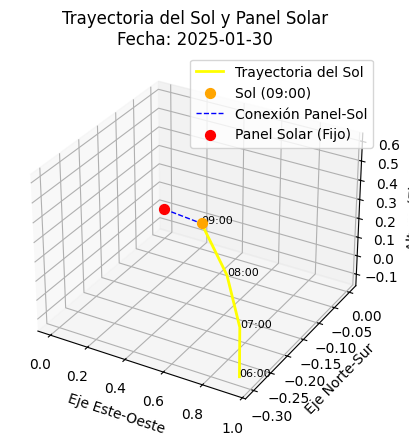

In [37]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from datetime import datetime, timedelta
from pytz import timezone
from pysolar.solar import get_altitude, get_azimuth

def getSolarPosition(latitude: float, longitude: float, date: datetime):
    """Calcula el azimut y la elevación para una posición geográfica y fecha."""
    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)
    return az, el

def spherical_to_cartesian(azimuths, elevations):
    """Convierte azimut y elevación a coordenadas 3D esféricas."""
    azimuths_rad = np.radians(azimuths)
    elevations_rad = np.radians(elevations)
    sun_x = np.cos(elevations_rad) * np.sin(azimuths_rad)
    sun_y = np.cos(elevations_rad) * np.cos(azimuths_rad)
    sun_z = np.sin(elevations_rad)
    return sun_x, sun_y, sun_z

def plotSunAndPanelTrajectoryInWindow(start_date, duration_hours, start_hour, latitude, longitude):
    """Dibuja la trayectoria del sol y su conexión con el panel solar en una ventana emergente con animación."""
    if start_date.tzinfo is None:
        start_date = timezone("America/Guayaquil").localize(start_date)

    times = [start_date + timedelta(hours=i) for i in range(int(duration_hours) + 1)]
    azimuths, elevations = zip(*[getSolarPosition(latitude, longitude, time) for time in times])
    sun_x, sun_y, sun_z = spherical_to_cartesian(azimuths, elevations)
    panel_x, panel_y, panel_z = [0], [0], [0]  # El panel solar está fijo en el suelo

    root = tk.Tk()
    root.title("Trayectoria del Sol y Panel Solar")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    
    def update_plot(i=0):
        if i < len(sun_x):
            ax.clear()
            ax.plot(sun_x[:i+1], sun_y[:i+1], sun_z[:i+1], label='Trayectoria del Sol', color='yellow', linewidth=2)
            ax.scatter(sun_x[i], sun_y[i], sun_z[i], color='orange', label=f'Sol ({times[i].strftime("%H:%M")})', s=50)
            ax.plot([panel_x[0], sun_x[i]], [panel_y[0], sun_y[i]], [panel_z[0], sun_z[i]], color='blue', linestyle='dashed', linewidth=1, label='Conexión Panel-Sol')
            ax.scatter(panel_x, panel_y, panel_z, color='red', label='Panel Solar (Fijo)', s=50)
            
            for j in range(i + 1):
                ax.text(sun_x[j], sun_y[j], sun_z[j], times[j].strftime('%H:%M'), fontsize=8, color='black')
            
            ax.set_xlabel('Eje Este-Oeste')
            ax.set_ylabel('Eje Norte-Sur')
            ax.set_zlabel('Altura (Eje Z)')
            ax.set_title(f'Trayectoria del Sol y Panel Solar\nFecha: {start_date.strftime("%Y-%m-%d")}')
            ax.legend()
            canvas.draw()
            root.after(500, update_plot, i + 1)  # Llamada recursiva para actualizar el gráfico
    
    update_plot()
    root.mainloop()

def interactive_plot():
    """Crea una interfaz para ingresar la fecha, hora inicial y duración de la simulación."""
    root = tk.Tk()
    root.title("Configuración de la Simulación Solar")
    
    tk.Label(root, text="Latitud:").grid(row=0, column=0)
    lat_entry = tk.Entry(root)
    lat_entry.grid(row=0, column=1)
    lat_entry.insert(0, "-0.2105367")
    
    tk.Label(root, text="Longitud:").grid(row=1, column=0)
    lon_entry = tk.Entry(root)
    lon_entry.grid(row=1, column=1)
    lon_entry.insert(0, "-78.491614")
    
    tk.Label(root, text="Fecha (YYYY-MM-DD):").grid(row=2, column=0)
    date_entry = tk.Entry(root)
    date_entry.grid(row=2, column=1)
    date_entry.insert(0, datetime.now().strftime("%Y-%m-%d"))
    
    tk.Label(root, text="Hora de Inicio:").grid(row=3, column=0)
    hour_entry = tk.Entry(root)
    hour_entry.grid(row=3, column=1)
    hour_entry.insert(0, "6")
    
    tk.Label(root, text="Duración (horas):").grid(row=4, column=0)
    duration_entry = tk.Entry(root)
    duration_entry.grid(row=4, column=1)
    duration_entry.insert(0, "12")
    
    def start_simulation():
        latitude = float(lat_entry.get())
        longitude = float(lon_entry.get())
        date = datetime.strptime(date_entry.get(), "%Y-%m-%d")
        start_hour = int(hour_entry.get())
        duration_hours = int(duration_entry.get())
        start_datetime = datetime.combine(date, datetime.min.time()).replace(hour=start_hour)
        start_datetime = timezone("America/Guayaquil").localize(start_datetime)
        root.destroy()
        plotSunAndPanelTrajectoryInWindow(start_datetime, duration_hours, start_hour, latitude, longitude)
    
    start_button = tk.Button(root, text="Iniciar Simulación", command=start_simulation)
    start_button.grid(row=5, column=0, columnspan=2)
    root.mainloop()

if __name__ == "__main__":
    interactive_plot()


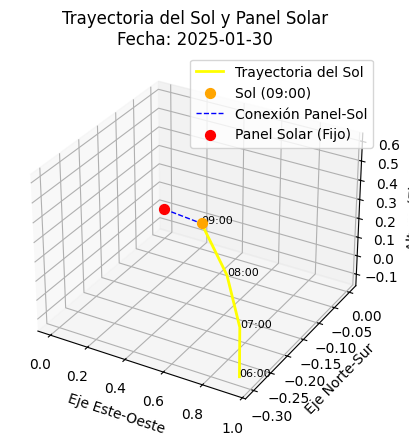

In [36]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from datetime import datetime, timedelta
from pytz import timezone
from pysolar.solar import get_altitude, get_azimuth

def getSolarPosition(latitude: float, longitude: float, date: datetime):
    """Calcula el azimut y la elevación para una posición geográfica y fecha."""
    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)
    return az, el

def spherical_to_cartesian(azimuths, elevations):
    """Convierte azimut y elevación a coordenadas 3D esféricas."""
    azimuths_rad = np.radians(azimuths)
    elevations_rad = np.radians(elevations)
    sun_x = np.cos(elevations_rad) * np.sin(azimuths_rad)
    sun_y = np.cos(elevations_rad) * np.cos(azimuths_rad)
    sun_z = np.sin(elevations_rad)
    return sun_x, sun_y, sun_z

def plotSunAndPanelTrajectoryInWindow(start_date, duration_hours, start_hour, latitude, longitude):
    """Dibuja la trayectoria del sol y su conexión con el panel solar en una ventana emergente con animación."""
    if start_date.tzinfo is None:
        start_date = timezone("America/Guayaquil").localize(start_date)

    times = [start_date + timedelta(hours=i) for i in range(int(duration_hours) + 1)]
    azimuths, elevations = zip(*[getSolarPosition(latitude, longitude, time) for time in times])
    sun_x, sun_y, sun_z = spherical_to_cartesian(azimuths, elevations)
    panel_x, panel_y, panel_z = [0], [0], [0]  # El panel solar está fijo en el suelo

    root = tk.Tk()
    root.title("Trayectoria del Sol y Panel Solar")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    
    def update_plot(i=0):
        if i < len(sun_x):
            ax.clear()
            ax.plot(sun_x[:i+1], sun_y[:i+1], sun_z[:i+1], label='Trayectoria del Sol', color='yellow', linewidth=2)
            ax.scatter(sun_x[i], sun_y[i], sun_z[i], color='orange', label=f'Sol ({times[i].strftime("%H:%M")})', s=50)
            ax.plot([panel_x[0], sun_x[i]], [panel_y[0], sun_y[i]], [panel_z[0], sun_z[i]], color='blue', linestyle='dashed', linewidth=1, label='Conexión Panel-Sol')
            ax.scatter(panel_x, panel_y, panel_z, color='red', label='Panel Solar (Fijo)', s=50)
            
            for j in range(i + 1):
                ax.text(sun_x[j], sun_y[j], sun_z[j], times[j].strftime('%H:%M'), fontsize=8, color='black')
            
            ax.set_xlabel('Eje Este-Oeste')
            ax.set_ylabel('Eje Norte-Sur')
            ax.set_zlabel('Altura (Eje Z)')
            ax.set_title(f'Trayectoria del Sol y Panel Solar\nFecha: {start_date.strftime("%Y-%m-%d")}')
            ax.legend()
            canvas.draw()
            root.after(500, update_plot, i + 1)  # Llamada recursiva para actualizar el gráfico
        else:
            root.after(1000, update_plot, 0)  # Reinicia la simulación desde el inicio
    
    update_plot()
    root.mainloop()

def interactive_plot():
    """Crea una interfaz para ingresar la fecha, hora inicial y duración de la simulación."""
    root = tk.Tk()
    root.title("Configuración de la Simulación Solar")
    
    tk.Label(root, text="Latitud:").grid(row=0, column=0)
    lat_entry = tk.Entry(root)
    lat_entry.grid(row=0, column=1)
    lat_entry.insert(0, "-0.2105367")
    
    tk.Label(root, text="Longitud:").grid(row=1, column=0)
    lon_entry = tk.Entry(root)
    lon_entry.grid(row=1, column=1)
    lon_entry.insert(0, "-78.491614")
    
    tk.Label(root, text="Fecha (YYYY-MM-DD):").grid(row=2, column=0)
    date_entry = tk.Entry(root)
    date_entry.grid(row=2, column=1)
    date_entry.insert(0, datetime.now().strftime("%Y-%m-%d"))
    
    tk.Label(root, text="Hora de Inicio:").grid(row=3, column=0)
    hour_entry = tk.Entry(root)
    hour_entry.grid(row=3, column=1)
    hour_entry.insert(0, "6")
    
    tk.Label(root, text="Duración (horas):").grid(row=4, column=0)
    duration_entry = tk.Entry(root)
    duration_entry.grid(row=4, column=1)
    duration_entry.insert(0, "12")
    
    def start_simulation():
        latitude = float(lat_entry.get())
        longitude = float(lon_entry.get())
        date = datetime.strptime(date_entry.get(), "%Y-%m-%d")
        start_hour = int(hour_entry.get())
        duration_hours = int(duration_entry.get())
        start_datetime = datetime.combine(date, datetime.min.time()).replace(hour=start_hour)
        start_datetime = timezone("America/Guayaquil").localize(start_datetime)
        root.destroy()
        plotSunAndPanelTrajectoryInWindow(start_datetime, duration_hours, start_hour, latitude, longitude)
    
    start_button = tk.Button(root, text="Iniciar Simulación", command=start_simulation)
    start_button.grid(row=5, column=0, columnspan=2)
    root.mainloop()

if __name__ == "__main__":
    interactive_plot()


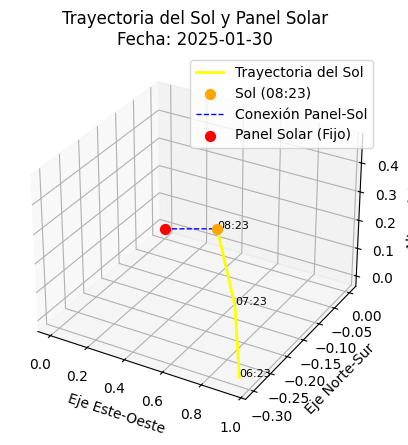

In [34]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from datetime import datetime, timedelta
from pytz import timezone
from pysolar.solar import get_altitude, get_azimuth
from astral import LocationInfo
from astral.sun import sun

def getSolarPosition(latitude: float, longitude: float, date: datetime):
    """Calcula el azimut y la elevación para una posición geográfica y fecha."""
    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)
    return az, el

def get_sunrise_sunset(latitude, longitude, date):
    """Obtiene la hora real de salida y puesta del sol para la ubicación y fecha ingresadas."""
    location = LocationInfo(latitude=latitude, longitude=longitude)
    s = sun(location.observer, date=date, tzinfo=timezone("America/Guayaquil"))
    return s['sunrise'], s['sunset']

def spherical_to_cartesian(azimuths, elevations):
    """Convierte azimut y elevación a coordenadas 3D esféricas."""
    azimuths_rad = np.radians(azimuths)
    elevations_rad = np.radians(elevations)
    sun_x = np.cos(elevations_rad) * np.sin(azimuths_rad)
    sun_y = np.cos(elevations_rad) * np.cos(azimuths_rad)
    sun_z = np.sin(elevations_rad)
    return sun_x, sun_y, sun_z

def plotSunAndPanelTrajectoryInWindow(start_date, latitude, longitude):
    """Dibuja la trayectoria del sol basada en la hora real de salida y puesta."""
    sunrise, sunset = get_sunrise_sunset(latitude, longitude, start_date.date())
    duration_hours = (sunset - sunrise).seconds // 3600
    
    times = [sunrise + timedelta(hours=i) for i in range(duration_hours + 1)]
    azimuths, elevations = zip(*[getSolarPosition(latitude, longitude, time) for time in times])
    sun_x, sun_y, sun_z = spherical_to_cartesian(azimuths, elevations)
    panel_x, panel_y, panel_z = [0], [0], [0]

    root = tk.Tk()
    root.title("Trayectoria del Sol y Panel Solar")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    
    def update_plot(i=0):
        if i < len(sun_x):
            ax.clear()
            ax.plot(sun_x[:i+1], sun_y[:i+1], sun_z[:i+1], label='Trayectoria del Sol', color='yellow', linewidth=2)
            ax.scatter(sun_x[i], sun_y[i], sun_z[i], color='orange', label=f'Sol ({times[i].strftime("%H:%M")})', s=50)
            ax.plot([panel_x[0], sun_x[i]], [panel_y[0], sun_y[i]], [panel_z[0], sun_z[i]], color='blue', linestyle='dashed', linewidth=1, label='Conexión Panel-Sol')
            ax.scatter(panel_x, panel_y, panel_z, color='red', label='Panel Solar (Fijo)', s=50)
            
            for j in range(i + 1):
                ax.text(sun_x[j], sun_y[j], sun_z[j], times[j].strftime('%H:%M'), fontsize=8, color='black')
            
            ax.set_xlabel('Eje Este-Oeste')
            ax.set_ylabel('Eje Norte-Sur')
            ax.set_zlabel('Altura (Eje Z)')
            ax.set_title(f'Trayectoria del Sol y Panel Solar\nFecha: {start_date.strftime("%Y-%m-%d")}')
            ax.legend()
            canvas.draw()
            root.after(500, update_plot, i + 1)  
        else:
            root.after(1000, update_plot, 0)  
    
    update_plot()
    root.mainloop()

def interactive_plot():
    """Crea una interfaz para ingresar la fecha y ubicación."""
    root = tk.Tk()
    root.title("Configuración de la Simulación Solar")
    
    tk.Label(root, text="Latitud:").grid(row=0, column=0)
    lat_entry = tk.Entry(root)
    lat_entry.grid(row=0, column=1)
    lat_entry.insert(0, "-0.2105367")
    
    tk.Label(root, text="Longitud:").grid(row=1, column=0)
    lon_entry = tk.Entry(root)
    lon_entry.grid(row=1, column=1)
    lon_entry.insert(0, "-78.491614")
    
    tk.Label(root, text="Fecha (YYYY-MM-DD):").grid(row=2, column=0)
    date_entry = tk.Entry(root)
    date_entry.grid(row=2, column=1)
    date_entry.insert(0, datetime.now().strftime("%Y-%m-%d"))
    
    def start_simulation():
        latitude = float(lat_entry.get())
        longitude = float(lon_entry.get())
        date = datetime.strptime(date_entry.get(), "%Y-%m-%d")
        start_datetime = timezone("America/Guayaquil").localize(date)
        root.destroy()
        plotSunAndPanelTrajectoryInWindow(start_datetime, latitude, longitude)
    
    start_button = tk.Button(root, text="Iniciar Simulación", command=start_simulation)
    start_button.grid(row=3, column=0, columnspan=2)
    root.mainloop()

if __name__ == "__main__":
    interactive_plot()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Adrian Correa\AppData\Local\Programs\Python\Python313\Lib\tkinter\__init__.py", line 2068, in __call__
    return self.func(*args)
           ~~~~~~~~~^^^^^^^
  File "C:\Users\Adrian Correa\AppData\Local\Temp\ipykernel_5124\1634333505.py", line 118, in start_simulation
    plotSunAndPanelTrajectoryInWindow(start_datetime, latitude, longitude)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Adrian Correa\AppData\Local\Temp\ipykernel_5124\1634333505.py", line 89, in plotSunAndPanelTrajectoryInWindow
    update_plot()
    ~~~~~~~~~~~^^
  File "C:\Users\Adrian Correa\AppData\Local\Temp\ipykernel_5124\1634333505.py", line 71, in update_plot
    ax.plot_trisurf(panel_x_rect, panel_y_rect, panel_z_rect, color='blue', alpha=0.6)
    ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Adrian Correa\AppData\Local\Programs\Py

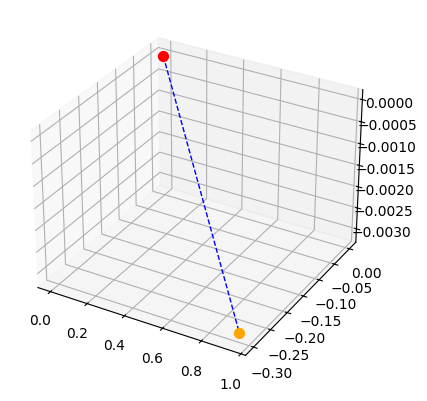

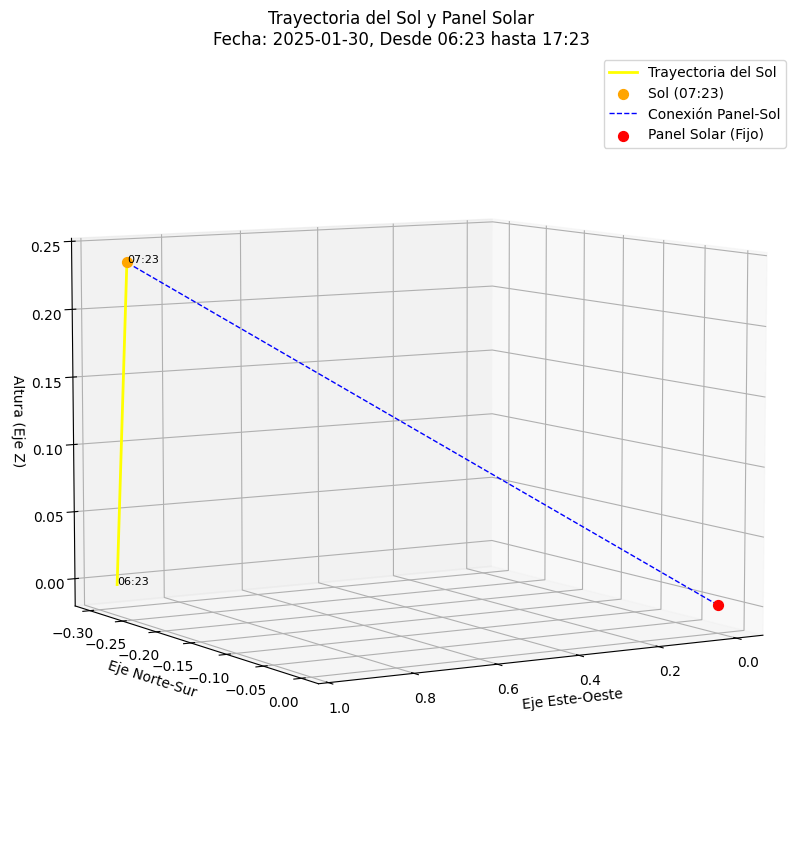

In [8]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from datetime import datetime, timedelta
from pytz import timezone
from pysolar.solar import get_altitude, get_azimuth
from astral import LocationInfo
from astral.sun import sun

def getSolarPosition(latitude: float, longitude: float, date: datetime):
    """Calcula el azimut y la elevación para una posición geográfica y fecha."""
    az = get_azimuth(latitude, longitude, date)
    el = get_altitude(latitude, longitude, date)
    return az, el

def get_sunrise_sunset(latitude, longitude, date):
    """Obtiene la hora real de salida y puesta del sol para la ubicación y fecha ingresadas."""
    location = LocationInfo("Guayaquil", "Ecuador", "America/Guayaquil", latitude, longitude)
    s = sun(location.observer, date=date, tzinfo=timezone("America/Guayaquil"))
    return s['sunrise'].astimezone(timezone("America/Guayaquil")), s['sunset'].astimezone(timezone("America/Guayaquil"))

def interactive_plot():
    """Crea una interfaz para ingresar la fecha, duración y ubicación."""
    root = tk.Tk()
    root.title("Configuración de la Simulación Solar")
    
    tk.Label(root, text="Latitud:").grid(row=0, column=0)
    lat_entry = tk.Entry(root)
    lat_entry.grid(row=0, column=1)
    lat_entry.insert(0, "-0.2105367")
    
    tk.Label(root, text="Longitud:").grid(row=1, column=0)
    lon_entry = tk.Entry(root)
    lon_entry.grid(row=1, column=1)
    lon_entry.insert(0, "-78.491614")
    
    tk.Label(root, text="Fecha (YYYY-MM-DD):").grid(row=2, column=0)
    date_entry = tk.Entry(root)
    date_entry.grid(row=2, column=1)
    date_entry.insert(0, datetime.now().strftime("%Y-%m-%d"))
    
    tk.Label(root, text="Duración (horas):").grid(row=3, column=0)
    duration_entry = tk.Entry(root)
    duration_entry.grid(row=3, column=1)
    duration_entry.insert(0, "12")
    
    sunrise_label = tk.Label(root, text="")
    sunrise_label.grid(row=5, column=0, columnspan=2)
    
    def update_sun_times():
        latitude = float(lat_entry.get())
        longitude = float(lon_entry.get())
        date = datetime.strptime(date_entry.get(), "%Y-%m-%d").date()
        sunrise, sunset = get_sunrise_sunset(latitude, longitude, date)
        sunrise_label.config(text=f"Salida del Sol: {sunrise.strftime('%H:%M')}  |  Puesta del Sol: {sunset.strftime('%H:%M')}")
    
    update_sun_times_button = tk.Button(root, text="Obtener Horas del Sol", command=update_sun_times)
    update_sun_times_button.grid(row=4, column=0, columnspan=2)
    
    def start_simulation():
        latitude = float(lat_entry.get())
        longitude = float(lon_entry.get())
        date = datetime.strptime(date_entry.get(), "%Y-%m-%d").date()
        duration = int(duration_entry.get())
        sunrise, sunset = get_sunrise_sunset(latitude, longitude, date)
        max_end_time = sunrise + timedelta(hours=duration)
        end_time = min(max_end_time, sunset)  # Se detiene en el tiempo de duración o puesta de sol
        root.destroy()
        plotSunAndPanelTrajectoryInWindow(sunrise, end_time, latitude, longitude)
    
    start_button = tk.Button(root, text="Iniciar Simulación", command=start_simulation)
    start_button.grid(row=6, column=0, columnspan=2)
    root.mainloop()

def plotSunAndPanelTrajectoryInWindow(start_time, end_time, latitude, longitude):
    """Dibuja la trayectoria del sol desde la salida hasta la puesta del sol."""
    times = []
    current_time = start_time
    while current_time <= end_time:
        times.append(current_time)
        current_time += timedelta(hours=1)  # Se actualiza cada hora
    
    azimuths, elevations = zip(*[getSolarPosition(latitude, longitude, time) for time in times])
    sun_x, sun_y, sun_z = spherical_to_cartesian(azimuths, elevations)
    panel_x, panel_y, panel_z = [0], [0], [0]
    
    root = tk.Tk()
    root.title("Trayectoria del Sol y Panel Solar")
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
    
    def update_plot(i=0):
        if i < len(sun_x):
            ax.clear()
            ax.plot(sun_x[:i+1], sun_y[:i+1], sun_z[:i+1], label='Trayectoria del Sol', color='yellow', linewidth=2)
            ax.scatter(sun_x[i], sun_y[i], sun_z[i], color='orange', label=f'Sol ({times[i].strftime("%H:%M")})', s=50)
            ax.plot([panel_x[0], sun_x[i]], [panel_y[0], sun_y[i]], [panel_z[0], sun_z[i]], color='blue', linestyle='dashed', linewidth=1, label='Conexión Panel-Sol')
            ax.scatter(panel_x, panel_y, panel_z, color='red', label='Panel Solar (Fijo)', s=50)
            
            for j in range(i + 1):
                ax.text(sun_x[j], sun_y[j], sun_z[j], times[j].strftime('%H:%M'), fontsize=8, color='black')
            
            ax.set_xlabel('Eje Este-Oeste')
            ax.set_ylabel('Eje Norte-Sur')
            ax.set_zlabel('Altura (Eje Z)')
            ax.set_title(f'Trayectoria del Sol y Panel Solar\nFecha: {start_time.strftime("%Y-%m-%d")}, Desde {start_time.strftime("%H:%M")} hasta {end_time.strftime("%H:%M")}')
            ax.legend()
            canvas.draw()
            root.after(500, update_plot, i + 1)  
        else:
            root.after(1000, update_plot, 0)  
    
    update_plot()
    root.mainloop()

def spherical_to_cartesian(azimuths, elevations):
    """Convierte azimut y elevación a coordenadas 3D esféricas."""
    azimuths_rad = np.radians(azimuths)
    elevations_rad = np.radians(elevations)
    sun_x = np.cos(elevations_rad) * np.sin(azimuths_rad)
    sun_y = np.cos(elevations_rad) * np.cos(azimuths_rad)
    sun_z = np.sin(elevations_rad)
    return sun_x, sun_y, sun_z

if __name__ == "__main__":
    interactive_plot()
